In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn import metrics
import time

In [87]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/_0eYOqji3unP1tDNKWZMjg/weatherAUS-2.csv"
df = pd.read_csv(url)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [88]:
nanSum = df.isnull().sum()

In [89]:
for e, n in zip(nanSum.index, nanSum):
    print(f'{e}: {n/df.shape[0]*100:.2f}%')

Date: 0.00%
Location: 0.00%
MinTemp: 1.02%
MaxTemp: 0.87%
Rainfall: 2.24%
Evaporation: 43.17%
Sunshine: 48.01%
WindGustDir: 7.10%
WindGustSpeed: 7.06%
WindDir9am: 7.26%
WindDir3pm: 2.91%
WindSpeed9am: 1.21%
WindSpeed3pm: 2.11%
Humidity9am: 1.82%
Humidity3pm: 3.10%
Pressure9am: 10.36%
Pressure3pm: 10.33%
Cloud9am: 38.42%
Cloud3pm: 40.81%
Temp9am: 1.21%
Temp3pm: 2.48%
RainToday: 2.24%
RainTomorrow: 2.25%


In [90]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('oe', OrdinalEncoder())
])

In [91]:
df = df.rename(columns={
    'RainToday': 'RainYesterday',
    'RainTomorrow': 'RainToday'
})

In [92]:
def date_to_season(date):
    match date.month:
        case 12 | 1 | 2:
            return 'Winter'
        case 3 | 4 | 5:
            return 'Spring'
        case 6 | 7 | 8:
            return 'Summer'
        case 9 | 10 | 11:
            return 'Autumn'
        case _:
            return np.nan

In [93]:
df['Date'] = pd.to_datetime(df['Date'])
df['Season'] = df['Date'].apply(date_to_season)
df = df.drop(columns=['Date'])
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday,Season
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,Winter
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,Winter
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,Winter
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,Winter
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,Summer
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,Summer
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,Summer
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,Summer


In [94]:
df_unlabeled = df.loc[df.RainToday.isnull()]
df = df.loc[df.index.difference(df_unlabeled.index)]
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday,Season
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,Winter
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,Winter
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,Winter
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,Winter
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,Summer
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,Summer
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,Summer
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,Summer


<Axes: xlabel='RainToday'>

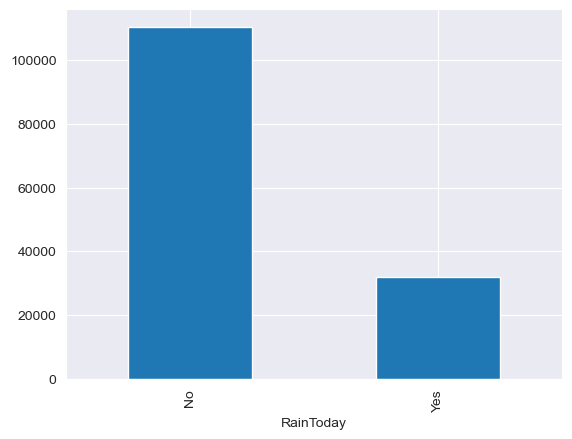

In [95]:
X = df.drop(columns=['RainToday'])
y = df['RainToday']

vc = y.value_counts()
vc.plot(kind='bar')

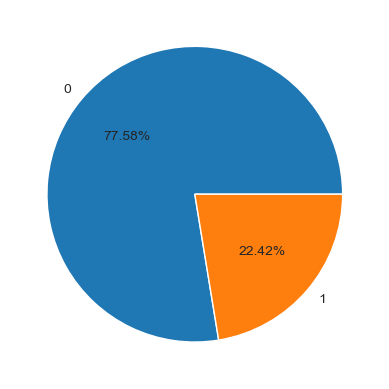

In [96]:
y_pie = y.map(lambda x: 1 if x == 'Yes' else 0)
y_pie = y_pie.value_counts()
plt.figure()
plt.pie(y_pie.values, labels=y_pie.index, autopct='%1.2f%%')
plt.show()

In [97]:
numeric_features = X.select_dtypes(include=['number', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category', 'str']).columns.tolist()
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])
X = preprocessor.fit_transform(X)

le = LabelEncoder()
y = le.fit_transform(y)

In [98]:
X

array([[13.4, 22.9,  0.6, ..., 14. ,  0. ,  3. ],
       [ 7.4, 25.1,  0. , ..., 15. ,  0. ,  3. ],
       [12.9, 25.7,  0. , ..., 15. ,  0. ,  3. ],
       ...,
       [ 3.6, 25.3,  0. , ...,  3. ,  0. ,  2. ],
       [ 5.4, 26.9,  0. , ..., 14. ,  0. ,  2. ],
       [ 7.8, 27. ,  0. , ...,  3. ,  0. ,  2. ]])

In [99]:
X_df = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())
X_df

,num__MinTemp,num__MaxTemp,num__Rainfall,num__Evaporation,num__Sunshine,num__WindGustSpeed,num__WindSpeed9am,num__WindSpeed3pm,num__Humidity9am,num__Humidity3pm,...,num__Cloud9am,num__Cloud3pm,num__Temp9am,num__Temp3pm,cat__Location,cat__WindGustDir,cat__WindDir9am,cat__WindDir3pm,cat__RainYesterday,cat__Season
0,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,...,8.000000,4.503167,16.9,21.8,2.0,13.0,13.0,14.0,0.0,3.0
1,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,...,4.437189,4.503167,17.2,24.3,2.0,14.0,6.0,15.0,0.0,3.0
2,12.9,25.7,0.0,5.469824,7.624853,46.0,19.0,26.0,38.0,30.0,...,4.437189,2.000000,21.0,23.2,2.0,15.0,13.0,15.0,0.0,3.0
3,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,45.0,16.0,...,4.437189,4.503167,18.1,26.5,2.0,4.0,9.0,0.0,0.0,3.0
4,17.5,32.3,1.0,5.469824,7.624853,41.0,7.0,20.0,82.0,33.0,...,7.000000,8.000000,17.8,29.7,2.0,13.0,1.0,7.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,5.469824,7.624853,31.0,15.0,13.0,59.0,27.0,...,4.437189,4.503167,9.4,20.9,41.0,0.0,2.0,0.0,0.0,2.0
142189,2.8,23.4,0.0,5.469824,7.624853,31.0,13.0,11.0,51.0,24.0,...,4.437189,4.503167,10.1,22.4,41.0,0.0,9.0,1.0,0.0,2.0
142190,3.6,25.3,0.0,5.469824,7.624853,22.0,13.0,9.0,56.0,21.0,...,4.437189,4.503167,10.9,24.5,41.0,6.0,9.0,3.0,0.0,2.0
142191,5.4,26.9,0.0,5.469824,7.624853,37.0,9.0,9.0,53.0,24.0,...,4.437189,4.503167,12.5,26.1,41.0,3.0,9.0,14.0,0.0,2.0


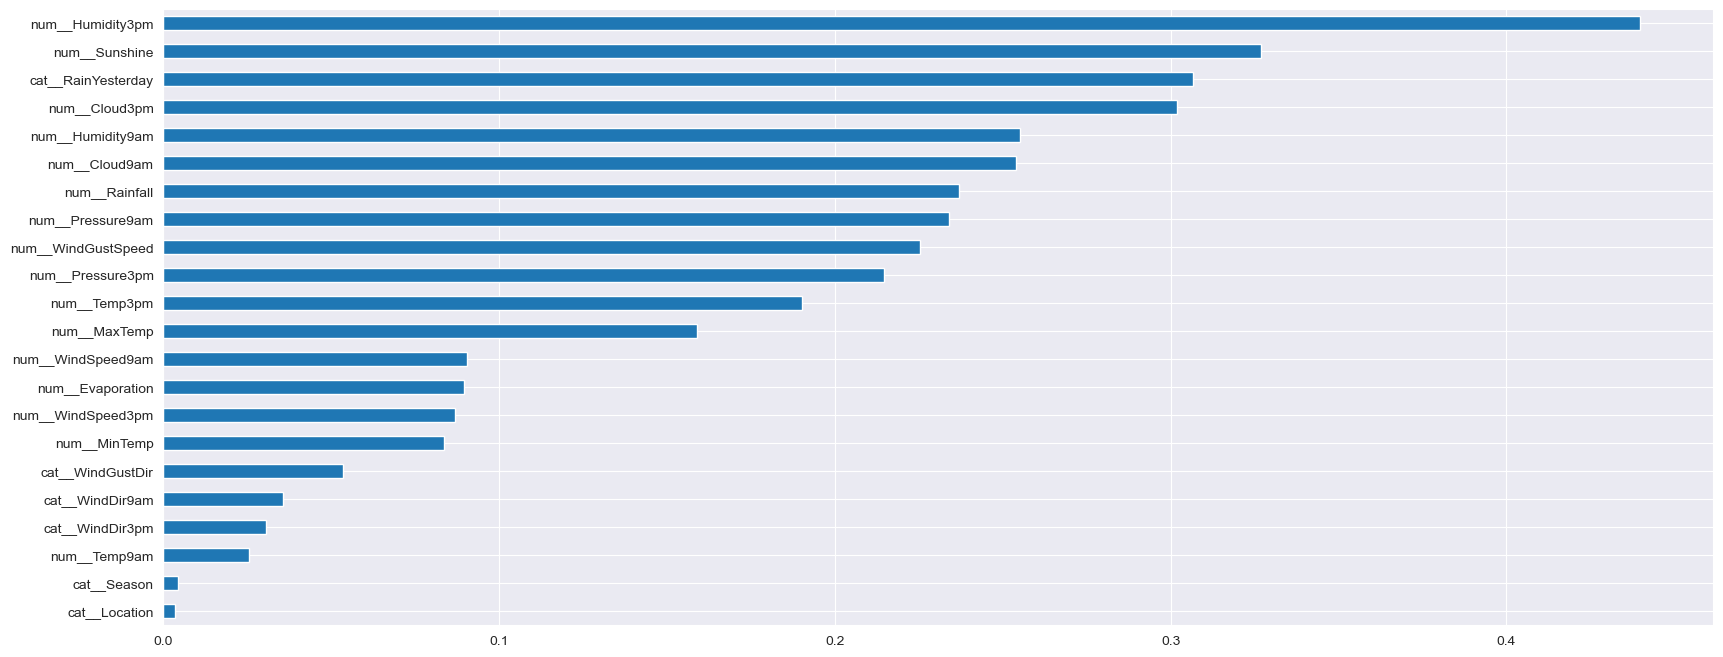

In [100]:
df_4_corr = X_df.copy()
df_4_corr['RainToday'] = y
correlations = df_4_corr.corr()['RainToday'].drop('RainToday').abs().sort_values(ascending=True)
correlations.plot(kind='barh', figsize=(20, 8))
plt.show()

In [101]:
important_features = correlations[-1:(correlations.index.get_loc('num__WindSpeed9am')):-1]
important_features


num__Humidity3pm      0.439678
num__Sunshine         0.327029
cat__RainYesterday    0.306555
num__Cloud3pm         0.301841
num__Humidity9am      0.255158
num__Cloud9am         0.253832
num__Rainfall         0.236874
num__Pressure9am      0.234027
num__WindGustSpeed    0.225264
num__Pressure3pm      0.214688
num__Temp3pm          0.190286
num__MaxTemp          0.159087
Name: RainToday, dtype: float64

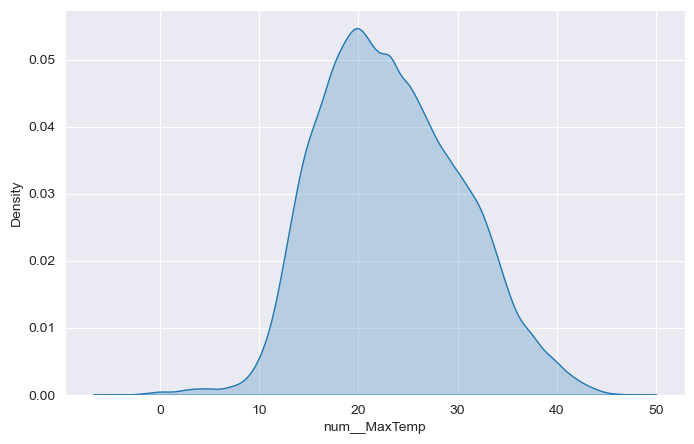

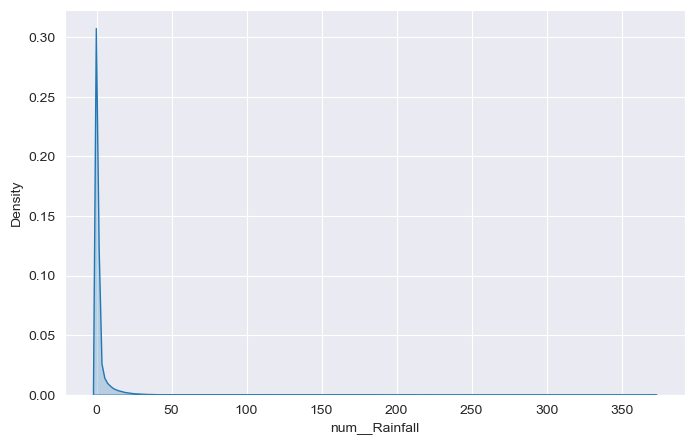

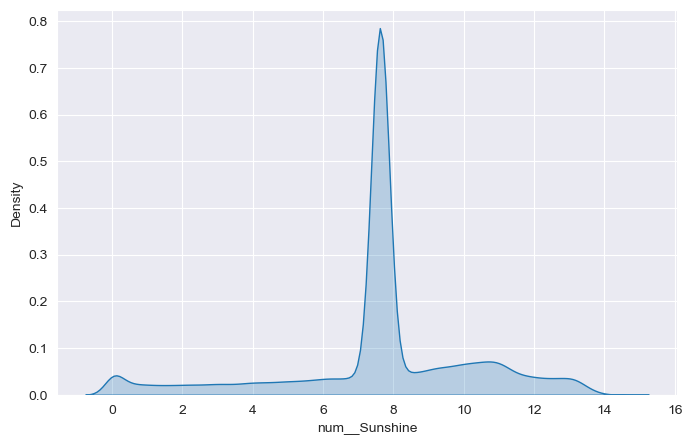

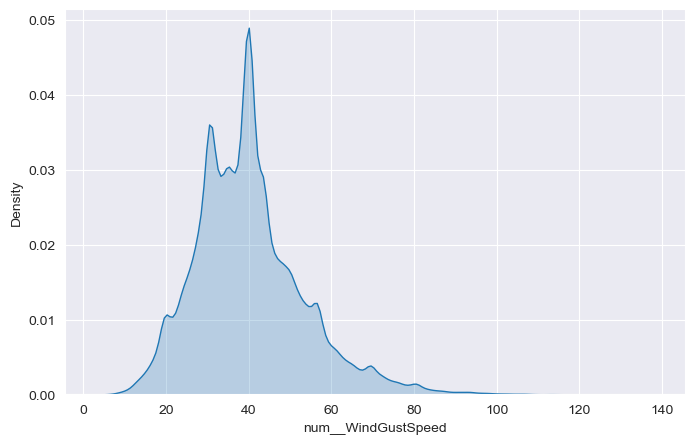

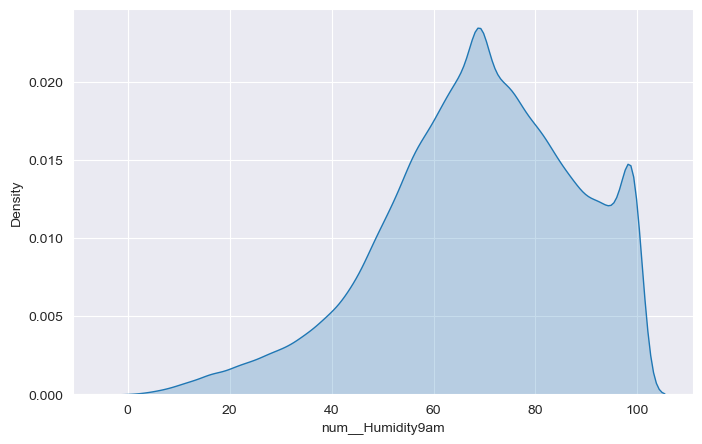

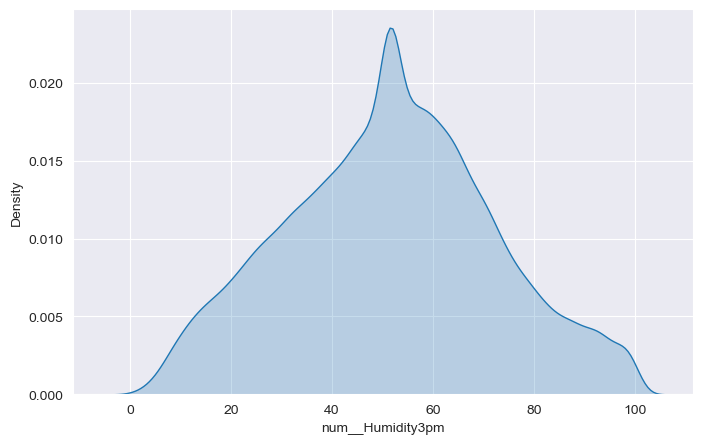

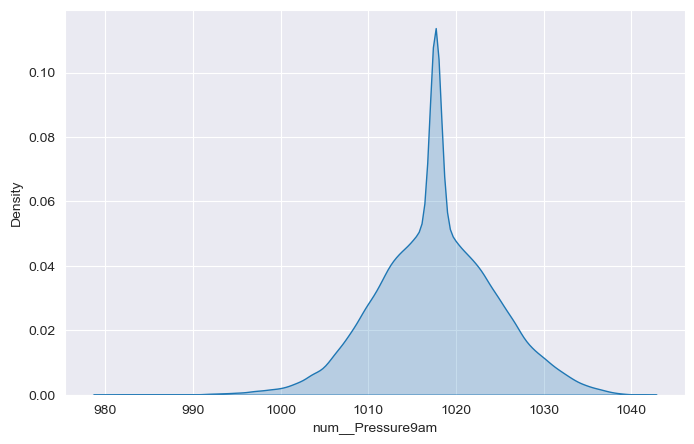

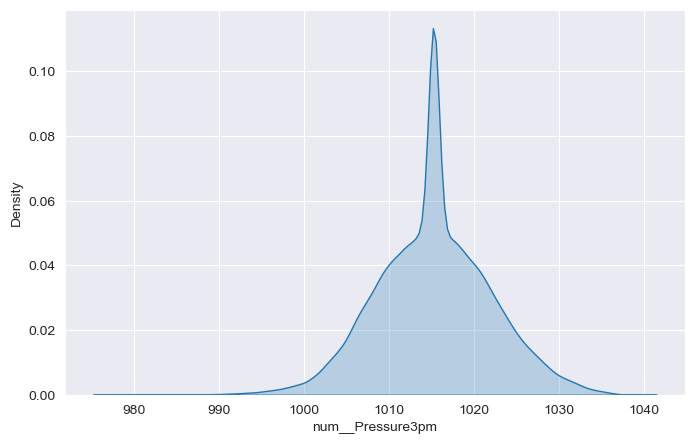

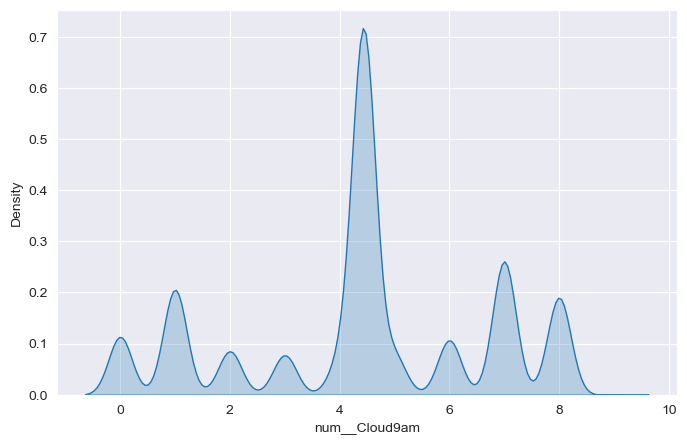

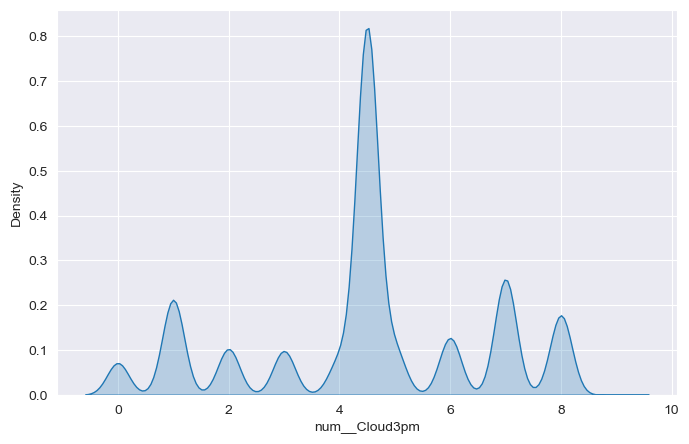

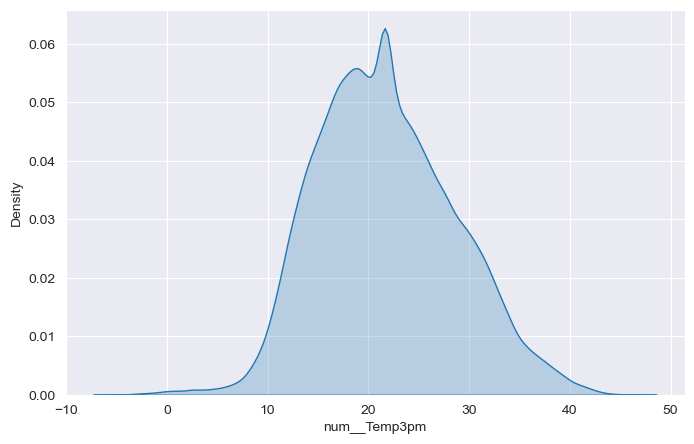

In [102]:
X_final = X_df[important_features.index]
for column in numeric_features:
    column = 'num__' + column
    if column in X_final.columns:
        plt.figure(figsize=(8,5))
        sns.kdeplot(data=X_final[column], fill=True)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)
demo_size_train = int(X_train.shape[0]/2)
demo_size_test = int(X_test.shape[0]/2)

In [104]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    random_state=42, n_jobs=-1, class_weight='balanced')

In [105]:
from xgboost import XGBClassifier
from sklearn.utils import class_weight

classes_train_weights = class_weight.compute_sample_weight(
    class_weight='balanced', y=y_train
)
xgb_model = XGBClassifier(random_state=42, n_jobs=-1)

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
linear_model = LogisticRegression(class_weight='balanced', n_jobs=-1)

In [107]:
from sklearn.svm import SVC

svm_linear = SVC(class_weight='balanced', kernel='linear')
svm_rbf = SVC(class_weight='balanced', kernel='rbf')
svm_poly = SVC(class_weight='balanced', kernel='poly')

Random forest accuracy: 0.8487
Random forest classification report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     10998
           1       0.77      0.47      0.59      3221

    accuracy                           0.85     14219
   macro avg       0.82      0.72      0.75     14219
weighted avg       0.84      0.85      0.83     14219

Random forest ROC-AUC score: 0.8774
Random forest False-Negative score: 1.1094
Random forest False-Positive score: 0.0435
Random forest time: 1.95 s


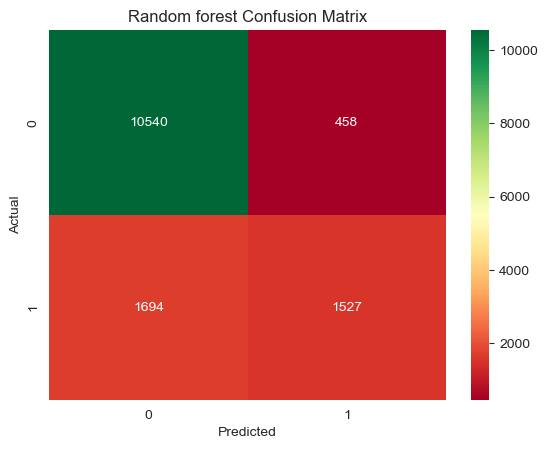

XGBoost accuracy: 0.8106
XGBoost classification report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87     10998
           1       0.56      0.77      0.65      3221

    accuracy                           0.81     14219
   macro avg       0.74      0.80      0.76     14219
weighted avg       0.84      0.81      0.82     14219

XGBoost ROC-AUC score: 0.8791
XGBoost False-Negative score: 0.2925
XGBoost False-Positive score: 0.2174
XGBoost time: 0.35 s


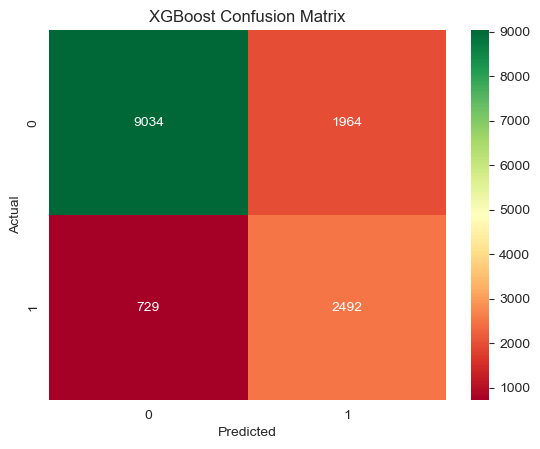

Logistic Regression accuracy: 0.7894
Logistic Regression classification report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     10998
           1       0.52      0.78      0.63      3221

    accuracy                           0.79     14219
   macro avg       0.72      0.78      0.74     14219
weighted avg       0.83      0.79      0.80     14219

Logistic Regression ROC-AUC score: 0.8661
Logistic Regression False-Negative score: 0.2879
Logistic Regression False-Positive score: 0.2608
Logistic Regression time: 2.15 s


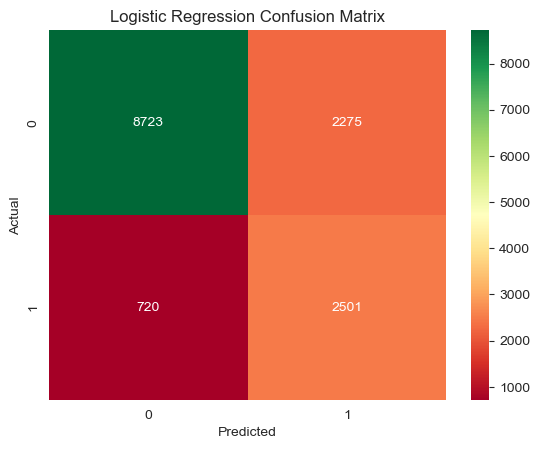

SVM Linear accuracy: 0.7911
SVM Linear classification report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86     10998
           1       0.53      0.77      0.63      3221

    accuracy                           0.79     14219
   macro avg       0.72      0.78      0.74     14219
weighted avg       0.83      0.79      0.80     14219

SVM Linear ROC-AUC score: 0.8660
SVM Linear False-Negative score: 0.2946
SVM Linear False-Positive score: 0.2553
SVM Linear time: 193.14 s


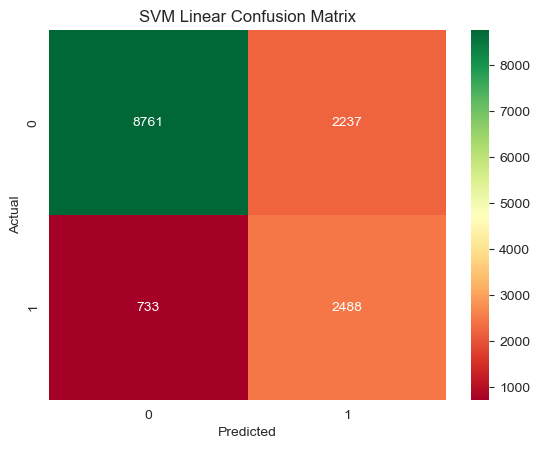

SVM RBF accuracy: 0.7964
SVM RBF classification report:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86     10998
           1       0.53      0.79      0.64      3221

    accuracy                           0.80     14219
   macro avg       0.73      0.79      0.75     14219
weighted avg       0.84      0.80      0.81     14219

SVM RBF ROC-AUC score: 0.8706
SVM RBF False-Negative score: 0.2681
SVM RBF False-Positive score: 0.2520
SVM RBF time: 198.37 s


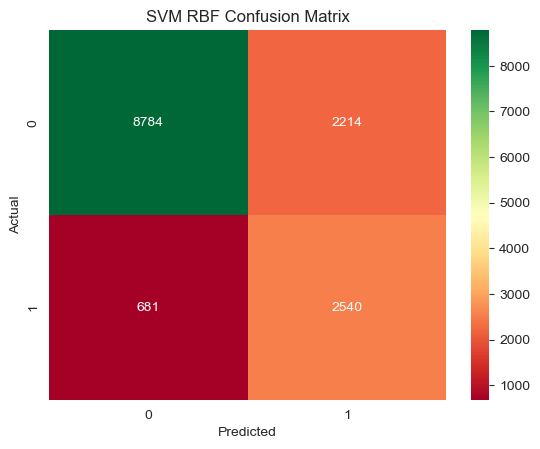

SVM Polynomial accuracy: 0.8135
SVM Polynomial classification report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87     10998
           1       0.57      0.71      0.63      3221

    accuracy                           0.81     14219
   macro avg       0.74      0.78      0.75     14219
weighted avg       0.83      0.81      0.82     14219

SVM Polynomial ROC-AUC score: 0.8646
SVM Polynomial False-Negative score: 0.4090
SVM Polynomial False-Positive score: 0.1850
SVM Polynomial time: 204.68 s


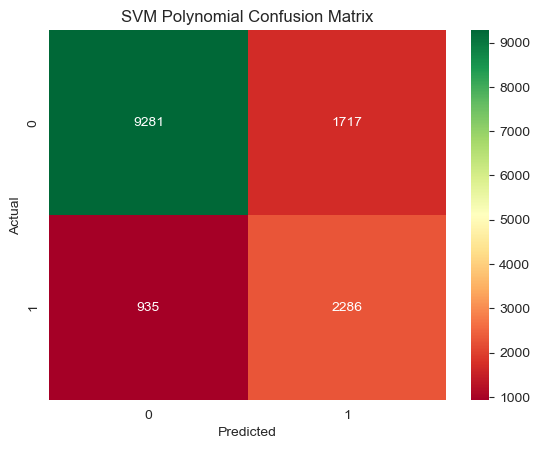

In [108]:
def evaluate(
        model, name, x_tr=X_train[:demo_size_train], y_tr=y_train[:demo_size_train],
        x_te=X_test[:demo_size_test], y_te=y_test[:demo_size_test], **kwargs
):
    start_time = time.time()

    model.fit(x_tr, y_tr, **kwargs)
    y_pred = model.predict(x_te)
    cm = metrics.confusion_matrix(y_te, y_pred)

    end_time = time.time()

    print(f'{name} accuracy: {metrics.accuracy_score(y_te, y_pred):.4f}')
    print(f'{name} classification report:\n {metrics.classification_report(y_te, y_pred)}')
    try:
        print(f'{name} ROC-AUC score: {metrics.roc_auc_score(y_te, model.predict_proba(x_te)[:, 1]):.4f}')
    except AttributeError:
        print(f'{name} ROC-AUC score: {metrics.roc_auc_score(y_te, model.decision_function(x_te)):.4f}')
    print(f'{name} False-Negative score: {cm[1, 0]/cm[1, 1]:.4f}')
    print(f'{name} False-Positive score: {cm[0, 1]/cm[0, 0]:.4f}')
    print(f'{name} time: {end_time - start_time:.2f} s')

    sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

evaluate(rf_model, 'Random forest')
evaluate(xgb_model, 'XGBoost', sample_weight=classes_train_weights[:demo_size_train])
evaluate(
    linear_model, 'Logistic Regression',
    x_tr=X_train_scaled[:demo_size_train], x_te=X_test_scaled[:demo_size_test])
evaluate(
    svm_linear, 'SVM Linear',
    x_tr=X_train_scaled[:demo_size_train], x_te=X_test_scaled[:demo_size_test])
evaluate(
    svm_rbf, 'SVM RBF',
    x_tr=X_train_scaled[:demo_size_train], x_te=X_test_scaled[:demo_size_test])
evaluate(
    svm_poly, 'SVM Polynomial',
    x_tr=X_train_scaled[:demo_size_train], x_te=X_test_scaled[:demo_size_test])
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK

In [109]:
from sklearn.model_selection import KFold, cross_val_score

space = {
    'max_depth': hp.quniform("max_depth", 3, 11, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.3)),
    'gamma': hp.uniform ('gamma', 0, 5),
    'reg_alpha' : hp.loguniform('reg_alpha', np.log(1e-3), np.log(10)),
    'reg_lambda' : hp.uniform('reg_lambda', 0, 5),
    'subsample' : hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 1),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 20, 1),
}

X_opt, _, y_opt, _ = train_test_split(
    X_train, y_train, test_size=0.0001, random_state=42, stratify=y_train, shuffle=True
)
ratio = float(np.sum(y_opt == 0) / np.sum(y_opt == 1))

def objective(search_space):
    search_space['max_depth'] = int(search_space['max_depth'])

    model = XGBClassifier(
        **search_space, n_jobs=-1, scale_pos_weight=ratio
    )
    k_fold = KFold(n_splits=4, shuffle=True, random_state=42)
    scores = cross_val_score(
        model, X_opt, y_opt, cv=k_fold, scoring='roc_auc', n_jobs=-1
    )
    return {'loss': -np.mean(scores), 'status': STATUS_OK}

best_params = fmin(
    fn=objective, space=space, algo=tpe.suggest, max_evals=100, verbose=True
)
best_params

100%|██████████| 100/100 [05:43<00:00,  3.43s/trial, best loss: -0.8814482155470746]


{'colsample_bytree': 0.9392633127035503,
 'gamma': 1.0173632154712835,
 'learning_rate': 0.11571380416361707,
 'max_depth': 9.0,
 'min_child_weight': 16.0,
 'reg_alpha': 4.92948363634226,
 'reg_lambda': 3.4073788757431682,
 'subsample': 0.9153938337005774}

Final XGBoost accuracy: 0.8094
Final XGBoost classification report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87     22064
           1       0.55      0.78      0.65      6375

    accuracy                           0.81     28439
   macro avg       0.74      0.80      0.76     28439
weighted avg       0.84      0.81      0.82     28439

Final XGBoost ROC-AUC score: 0.8854
Final XGBoost False-Negative score: 0.2819
Final XGBoost False-Positive score: 0.2227
Final XGBoost time: 0.64 s


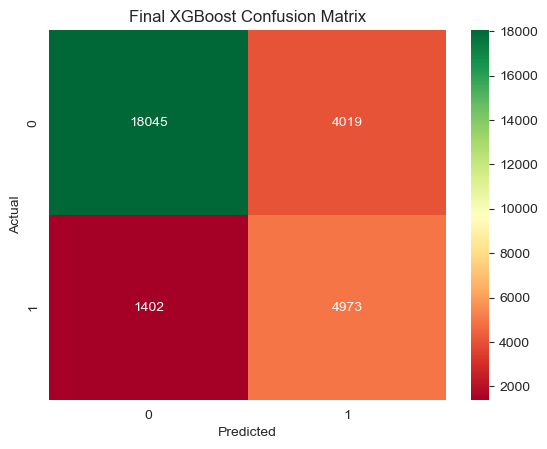

In [110]:
best_params['max_depth'] = int(best_params['max_depth'])
final_ratio = float(np.sum(y == 0) / np.sum(y == 1))
XGBFinal = XGBClassifier(**best_params, n_jobs=-1, scale_pos_weight=final_ratio)
evaluate(
    XGBFinal, 'Final XGBoost', X_train, y_train,X_test, y_test
)

In [111]:
df_unlabeled = preprocessor.fit_transform(df_unlabeled.drop('RainToday', axis=1))

In [112]:
df_unlabeled = pd.DataFrame(df_unlabeled, columns=preprocessor.get_feature_names_out())

In [113]:
df_unlabeled['RainToday'] = XGBFinal.predict(df_unlabeled[important_features.index])
df_unlabeled

,num__MinTemp,num__MaxTemp,num__Rainfall,num__Evaporation,num__Sunshine,num__WindGustSpeed,num__WindSpeed9am,num__WindSpeed3pm,num__Humidity9am,num__Humidity3pm,...,num__Cloud3pm,num__Temp9am,num__Temp3pm,cat__Location,cat__WindGustDir,cat__WindDir9am,cat__WindDir3pm,cat__RainYesterday,cat__Season,RainToday
0,8.4,24.600000,0.000000,5.370076,6.796154,43.012753,4.000000,30.000000,57.0,32.0,...,5.083749,15.9,23.5,2.0,3.0,8.0,14.0,0.0,3.0,0
1,2.6,22.890077,0.000000,5.370076,6.796154,43.012753,6.000000,13.000000,71.0,55.0,...,6.000000,9.7,14.3,2.0,3.0,0.0,14.0,0.0,0.0,0
2,22.1,35.100000,0.000000,5.370076,6.796154,43.012753,6.000000,11.000000,58.0,37.0,...,1.000000,26.9,33.5,2.0,3.0,1.0,12.0,0.0,3.0,0
3,21.5,35.000000,0.000000,5.370076,6.796154,43.012753,9.000000,7.000000,76.0,35.0,...,8.000000,24.2,33.1,2.0,3.0,10.0,0.0,0.0,3.0,1
4,15.5,30.600000,0.000000,5.370076,6.796154,43.012753,6.000000,11.000000,66.0,30.0,...,5.083749,19.4,30.0,2.0,3.0,9.0,11.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3262,22.5,37.700000,0.000000,5.370076,6.796154,50.000000,33.000000,26.000000,22.0,11.0,...,5.083749,28.8,37.2,38.0,9.0,9.0,2.0,0.0,3.0,0
3263,12.3,19.100000,0.000000,5.370076,6.796154,43.012753,16.092697,19.897354,79.0,62.0,...,8.000000,15.6,18.9,38.0,3.0,3.0,8.0,0.0,2.0,1
3264,14.2,18.700000,3.452125,5.370076,6.796154,43.012753,9.000000,19.897354,81.0,67.0,...,8.000000,16.6,17.5,38.0,3.0,13.0,8.0,0.0,2.0,1
3265,13.5,22.890077,0.000000,5.370076,6.796154,43.012753,24.000000,7.000000,23.0,11.0,...,5.083749,25.2,34.4,38.0,3.0,1.0,12.0,0.0,3.0,0
